##Importing necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

Mounted at /content/drive


## Load Data

In [2]:
marketing=pd.read_csv('/content/drive/MyDrive/Data/Marketing.csv')
print(marketing)
marketing.info()

    Method_1  Method_2
0     115.49     80.84
1     110.34    104.88
2     114.31    111.82
3     118.73     96.49
4      92.80    116.58
5      84.58     99.19
6      95.47    102.05
7     111.18    109.74
8     100.83    101.18
9     106.10     85.52
10    112.41    100.54
11     99.98     87.51
12     89.42    100.88
13     82.75    101.19
14     74.20    105.19
15     93.93     84.48
16    107.97    106.69
17    100.97    106.83
18    112.07     88.39
19    119.87    113.55
20    107.54    102.74
21     89.45     84.74
22    128.52     92.49
23    106.18     84.14
24    116.38     91.56
25     93.12     98.26
26    106.29     98.86
27     88.62    106.54
28    121.07     90.65
29    108.52    105.62
30     96.69       NaN
31    113.65       NaN
32     91.51       NaN
33    103.75       NaN
34     95.70       NaN
35    116.16       NaN
36    115.19       NaN
37    111.04       NaN
38     88.53       NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data colum

Since Method_2 has some NAN values, so storing numerical values of two different methods in two different variables

In [11]:
M1=marketing['Method_1']
M2=marketing['Method_2'][0:30]
print(M1,M2)

0     115.49
1     110.34
2     114.31
3     118.73
4      92.80
5      84.58
6      95.47
7     111.18
8     100.83
9     106.10
10    112.41
11     99.98
12     89.42
13     82.75
14     74.20
15     93.93
16    107.97
17    100.97
18    112.07
19    119.87
20    107.54
21     89.45
22    128.52
23    106.18
24    116.38
25     93.12
26    106.29
27     88.62
28    121.07
29    108.52
30     96.69
31    113.65
32     91.51
33    103.75
34     95.70
35    116.16
36    115.19
37    111.04
38     88.53
Name: Method_1, dtype: float64 0      80.84
1     104.88
2     111.82
3      96.49
4     116.58
5      99.19
6     102.05
7     109.74
8     101.18
9      85.52
10    100.54
11     87.51
12    100.88
13    101.19
14    105.19
15     84.48
16    106.69
17    106.83
18     88.39
19    113.55
20    102.74
21     84.74
22     92.49
23     84.14
24     91.56
25     98.26
26     98.86
27    106.54
28     90.65
29    105.62
Name: Method_2, dtype: float64


##Assumptions

####1. Independent samples

Since both the methods are applied in two different accounts, so they are independent with each other

####2. Outliers

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


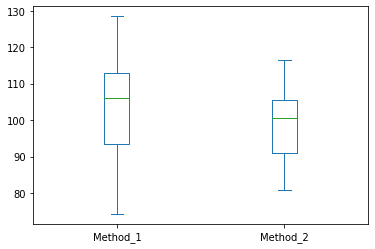

In [4]:
marketing.plot.box()

There seems to be no outliers from the two boxplots

#### 3. Normality of data

##### Method 1: Q-Q Plot

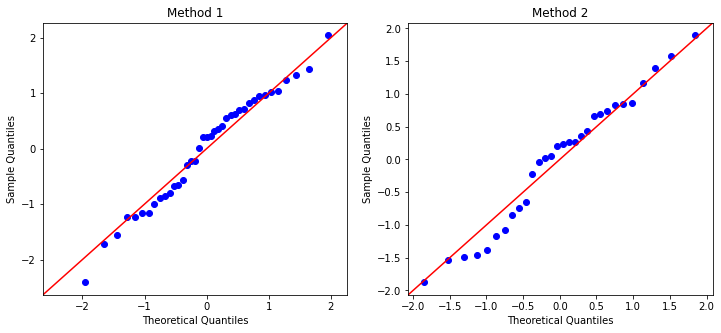

In [5]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5),squeeze=False)
M1_QQ=sm.qqplot(M1,stats.norm,fit=True,line='45',ax=axes[0,0])
M2_QQ=sm.qqplot(M2,stats.norm,fit=True,line='45',ax=axes[0,1])

axes[0, 0].set_title("Method 1")
axes[0, 1].set_title("Method 2")
plt.show()

From the Q-Q plot we can conclude that data is fairly normally distributed

##### **Method 2: Shapiro-Wilk Test**

Null Hypothesis(Ho): Population has a normal distribution

Alternative Hypothesis: Population does not have a normal distribution

In [6]:
s1,p1=stats.shapiro(M1)
print('For Method 1 Data, test statistic is %.4f and p-value is %.4f'%(s1,p1))
s2,p2=stats.shapiro(M2)
print('For Method 2 Data, test statistic is %.4f and p-value is %.4f'%(s2,p2))

For Method 1 Data, test statistic is 0.9755 and p-value is 0.5434
For Method 2 Data, test statistic is 0.9606 and p-value is 0.3203


For both the data, p-value is greater than 0.05, so we do not reject null hypothesis at 5% level of significance and conclude that both are normally distributed

#### 4. Equality of Variance


##### **Levene Test**
Null Hypothesis(Ho): Variance of data of both the methods are equal

Alternative Hypothesis (H1): Variance of data of both the methods are not equal

In [7]:
l,p=stats.levene(M1,M2)
print('The test statistic is %.4f and p-value is %.4f'%(l,p))

The test statistic is 2.3244 and p-value is 0.1321


Since p value is greater than 0.05, so we do not reject the null at 5% level of significance. Hence we conclude that the variance of data of both the genders are equal, so we can proceed with independent sample t-test

Note: In case of unequal variance, we should prefer Welch t test instead of independent t test.

##Independent Sample t-test

Null Hypothesis(Ho): The population means of impression from Method 1 and Method 2 are equal. i.e. Ho: μ1=μ2 

Alternative Hypothesis(H1): The population mean of impression from Method 1 is greater than Method 2. i.e. H1: μ1 > μ2


LeveL of significance(α): Let us test the hypothesis at 5% level of significance i.e. α=0.05

Decision Rule: If p-value<0.05 we reject the null hypothesis and if p-value>0.05 we do not reject the null hypothesis

In [13]:
t,p=stats.ttest_ind(M1,M2,alternative='greater')
print('The test statistic is %.4f and p-value is %.4f'%(t,p))

The test statistic is 1.8229 and p-value is 0.0364


Since p-value is less than 0.05 i.e. 0.0364<0.05, so we reject the null hypothesis at 5% level of significance and conclude that mean impression from Method 1 is significantly greater than mean impression from Method 2.